In [8]:
#verify the csv file

import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
file_path = 'lstm_dataset.csv'
data = pd.read_csv(file_path)

# Print the shape of the DataFrame
print(data.shape)

# Extract columns as NumPy arrays
gust = data['Gust'].values
precipitation = data['Precipitation'].values
temperature = data['Temperature'].values
moisture_sensor = data['MoistureSensor'].values
growth_stage = data['GrowthStage'].values

# Print the lengths of the arrays
print(len(gust), len(precipitation), len(temperature), len(moisture_sensor), len(growth_stage))


(1000, 7)
1000 1000 1000 1000 1000


In [29]:
# Model training


# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

df=pd.read_csv('lstm_dataset.csv')

# Sample data (replace this with your actual data)
Gust_data = df['Gust'].values  # Replace with your weather API data
Precipitation_data = df['Precipitation'].values  # Replace with your weather API data
Pressure_data = df['Pressure'].values  # Replace with your weather API data
Temperature_data = df['Temperature'].values  # Replace with your weather API data
moisture_data = df['MoistureSensor'].values  # Replace with your soil moisture sensor data
growth_stage_data = df['GrowthStage'].values  # Replace with your YOLO model predictions
water_requirement_labels = df['Water_required'].values  # Replace with actual water requirement data

# Combine data into a unified dataset
X = np.column_stack((Gust_data,Precipitation_data,Pressure_data,Temperature_data, moisture_data, growth_stage_data))
y = water_requirement_labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1],1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape data for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],1))

# Train the model
history=model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Make predictions on test data
predictions = model.predict(X_test)




Epoch 1/1000
25/25 - 4s - loss: 218180.4531 - val_loss: 204359.2188 - 4s/epoch - 174ms/step
Epoch 2/1000
25/25 - 0s - loss: 216979.9062 - val_loss: 201599.5000 - 165ms/epoch - 7ms/step
Epoch 3/1000
25/25 - 0s - loss: 212392.5938 - val_loss: 196743.7812 - 166ms/epoch - 7ms/step
Epoch 4/1000
25/25 - 0s - loss: 209054.6406 - val_loss: 194665.2188 - 149ms/epoch - 6ms/step
Epoch 5/1000
25/25 - 0s - loss: 207318.9062 - val_loss: 193191.2812 - 161ms/epoch - 6ms/step
Epoch 6/1000
25/25 - 0s - loss: 205925.5781 - val_loss: 191888.4844 - 215ms/epoch - 9ms/step
Epoch 7/1000
25/25 - 0s - loss: 204629.9375 - val_loss: 190654.1406 - 152ms/epoch - 6ms/step
Epoch 8/1000
25/25 - 0s - loss: 203413.0156 - val_loss: 189466.3438 - 154ms/epoch - 6ms/step
Epoch 9/1000
25/25 - 0s - loss: 202235.4219 - val_loss: 188339.8594 - 173ms/epoch - 7ms/step
Epoch 10/1000
25/25 - 0s - loss: 201103.7656 - val_loss: 187246.0469 - 166ms/epoch - 7ms/step
Epoch 11/1000
25/25 - 0s - loss: 200006.5156 - val_loss: 186170.5625 -

In [30]:
# Evaluate the model

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 45379.648335689104


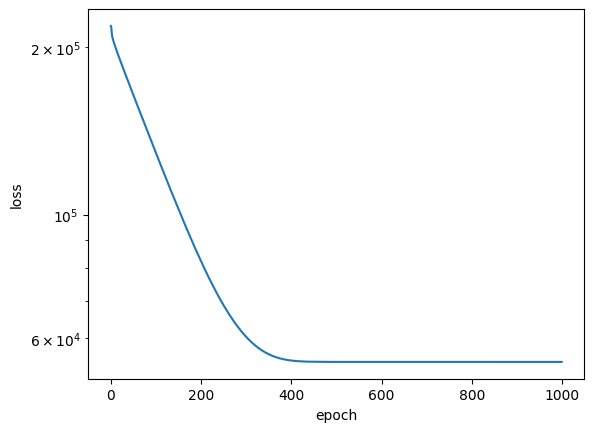

In [31]:
plt.figure()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.semilogy(history.history['loss'])

In [32]:

import json

# Load weather data
with open('weather_data.json', 'r') as file:
    weather_data = json.load(file)
# print("Weather Data:", weather_data)


# Load YOLO predictions
with open('yolo_predictions.json', 'r') as file:
    yolo_predictions = json.load(file)
# print("YOLO Predictions:", yolo_predictions)


g_dta=weather_data["wind"]["speed"]
p_dta=0
pressure_dta=weather_data["main"]["pressure"]
temp_dta=weather_data["main"]["temp"]
mois_dta=500
grwth_dta=yolo_predictions["object_detected"]
print(g_dta)
to_be_predicted = np.column_stack((Gust_data,Precipitation_data,Pressure_data,Temperature_data, moisture_data, growth_stage_data))

predictions=model.predict(to_be_predicted)
print(predictions[0][0])


5.14
32/32 [==============================] - 1s 3ms/step
398.82175


In [34]:
# main_module.py
import json
import numpy as np
from weather import get_weather_data
from yolo_prediction import yolo_prediction

# Load weather data
with open('weather_data.json', 'r') as file:
    weather_data = json.load(file)

# Load YOLO predictions
with open('yolo_predictions.json', 'r') as file:
    yolo_predictions = json.load(file)

# Extract relevant data
gust_data = weather_data["wind"]["speed"]
precipitation_data = 0  # Replace with actual data
pressure_data = weather_data["main"]["pressure"]
temperature_data = weather_data["main"]["temp"]
moisture_data = 500  # Replace with actual data
growth_stage_data = yolo_predictions["object_detected"]
to_be_predicted = np.column_stack((gust_data, precipitation_data, pressure_data, temperature_data, moisture_data, growth_stage_data))

# Make predictions using your model
# Replace the following line with your model.predict() call
predictions = model.predict(to_be_predicted)

print(predictions)


TypeError: in user code:

    File "c:\Users\mhari\anaconda3\envs\legit\Lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\mhari\anaconda3\envs\legit\Lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\mhari\anaconda3\envs\legit\Lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\mhari\anaconda3\envs\legit\Lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "c:\Users\mhari\anaconda3\envs\legit\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\mhari\anaconda3\envs\legit\Lib\site-packages\keras\src\layers\rnn\lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_4' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_4' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None
